# k-최근접 이웃 회귀

이전에는 target에 0과 1을 저장하여 이진 분류를 진행, 이번에는 k-최근접 이웃 회귀, 선형회귀, 다항회귀를 이용하여 독립변수(길이)로 종속변수(무게)를 예측하는 실습

In [616]:
import numpy as np
import matplotlib.pyplot as plt

In [617]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
                         21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
                         22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
                         27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
                         36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
                         40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
                         110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
                         130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
                         197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
                         514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
                         820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
                         1000.0, 1000.0])

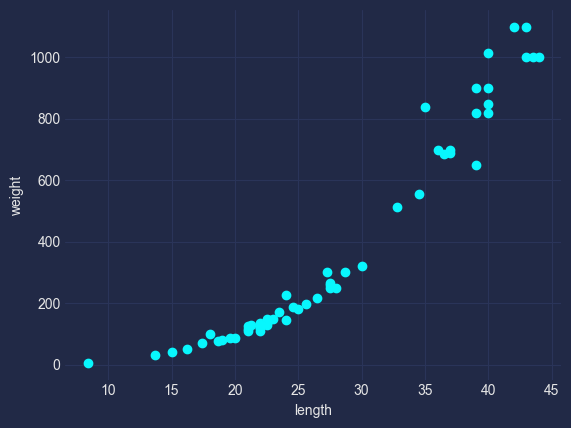

In [618]:
import matplotlib.pyplot as plt
plt.style.use("cyberpunk")
    
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [619]:
from sklearn.model_selection import train_test_split

# train, test 데이터 분리
# 도미,빙어 데이터셋과 다른점은 target이 0과1이 저장된 정답 데이터가 아닌 종속변수인 weight 데이터라는 것. -> 우리는 분류말고 회귀분석을 할거다.
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)
print(train_input.shape, test_input.shape)

(42,) (14,)


### scikit-learn으로 회귀 분석 진행 시 유의사항
##### 일반적으로 사이킷런의 모델은 타겟으로 1차원 배열을 기대함. 만약 타깃을 (m, 1) 크기의 2차원 배열로 전달해도 (m,) 로 바꾸어 사용함. 그러나 훈련 데이터는 2차원 배열로 변환해줄 필요가 있다. 사이킷런 모델이 2차원 배열이라고 예상하기 때문에 (독립변수는 여러개가 될 수 있으니)

##### 선형 회귀 모델을 포함한 대부분의 머신러닝 모델들은 다차원의 특성을 다루며, 각 샘플의 여러 특성들을 기반으로 예측을 수행한다. 따라서, 모델이 특정 샘플에 대해 예측을 수행할 때, 해당 샘플의 모든 관련 특성을 함께 고려할 수 있도록 입력 데이터를 구조화해야 한다. 이를 위해 scikit-learn에서는 2차원 배열 형태의 입력 데이터를 요구하게 된다.


In [620]:
# 학습에 맞는 데이터 형태로 변환
# reshape(-1,1) 의미 : 원소 수는 그대로 유지(자동으로 필요한 만큼 행이 생김)하면서 배열을 2차원 배열로 변환하고 각 원소가 하나의 행을 갖게됨
# 입력 데이터는 2차원 배열 형태여야 하는데, 이는 각 행이 샘플(sample)을 나타내고 각 열이 특성(feature)을 나타내야 하기 때문에
# 농어의 길이만을 사용하는 단순 선형 회귀 모델을 학습시키기 위해서는, 각 농어의 길이가 하나의 특성으로 처리되어야 하며, 이를 위해 2차원 배열로 변환
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input[:5], "\n\n", test_input[:5])


[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]] 

 [[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]]


## 결정 계수 ($ R^2$)

#### 회귀 모델에서 독립변수가 종속변수를 얼마만큼 설명해 주는지를 가리키는 지표

In [621]:
from sklearn.neighbors import KNeighborsRegressor # k-최근접 이웃 회귀

# KNeighborsRegressor 클래스 임포트 이후 인스턴스 생성하여 knr 변수에 할당
knr = KNeighborsRegressor()
# 모델 학습. fit 메서드는 학습 데이터(train_input)와 대응되는 타겟 값(train_target)을 인자로 받음 이 과정에서 모델은 주어진 학습 데이터에 최적화됨
knr.fit(train_input, train_target)
# 테스트 데이터에 대한 모델의 성능을 평가 / 회귀 모델의 경우, score 메서드는 결정 계수(R²) 값을 반환
# 1에 가까울수록 모델이 데이터를 잘 예측한다는 의미
knr.score(test_input, test_target)

0.992809406101064

In [622]:
# 다양한 방식의 r2 score 계산
# ssr = ((train_target - knr.predict(train_input)) ** 2).sum()
# sst = ((train_target - train_target.mean()) ** 2).sum()
# r2_2 = 1 - (ssr / sst)
# print(r2_2)

# from sklearn.metrics import r2_score
# r2_1 = r2_score(train_target, knr.predict(train_input))
# print(r2_1)

# r2_3 = knr.score(train_input, train_target)
# print(r2_3)

In [623]:
from sklearn.metrics import mean_absolute_error

# predict 생성
test_prediction = knr.predict(test_input)

# MAE 계산
# 예측의 정확도를 평가하는 지표로 모든 데이터 포인트에서의 실제 값과 예측 값의 차이의 절댓값을 합한 후, 데이터 포인트의 수로 나눈 값
mae = mean_absolute_error(test_target, test_prediction)

print(mae)

19.157142857142862


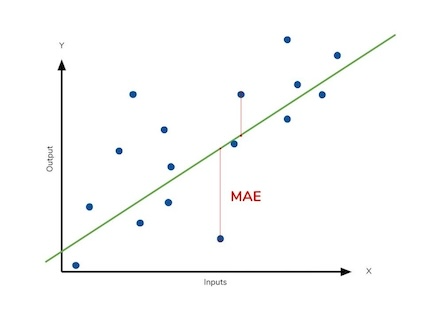

## 과대적합 vs 과소적합

In [624]:
# 과소적합(Underfitting) 상태 
# 모델이 너무 단순해 데이터를 학습하지 못함 / test 데이터가 train 데이터의 분포를 잘 반영하지 못함
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099254
0.992809406101064


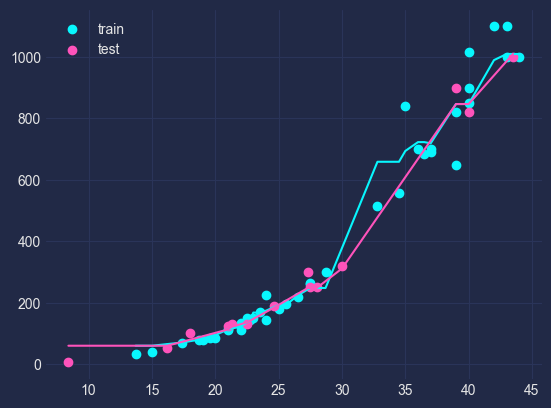

In [625]:
plt.style.use("cyberpunk")

plt.scatter(train_input, train_target, label='train')
plt.plot(sorted(train_input), knr.predict(sorted(train_input)))
plt.scatter(test_input, test_target, label='test')
plt.plot(sorted(test_input), knr.predict(sorted(test_input)))
plt.legend()
plt.show()

In [626]:
# 3개의 최근접 이웃으로 회귀 수행 (이웃 수를 조정하여 과대적합/과소적합을 해결할 필요가 있음)
# score를 보면 어느정도 해결된 것을 볼 수 있다.
# 이웃이 적으면 과대적합(훈련 데이터가 학습이 너무 잘 되어 오히려 테스트 점수가 낮음) 너무 많으면 과소적합 (훈련 데이터 자체가 학습이 덜 되어버림)
knr.n_neighbors = 3
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


## 확인문제

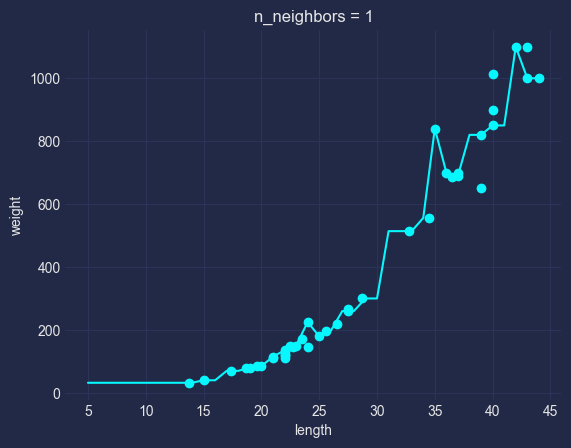

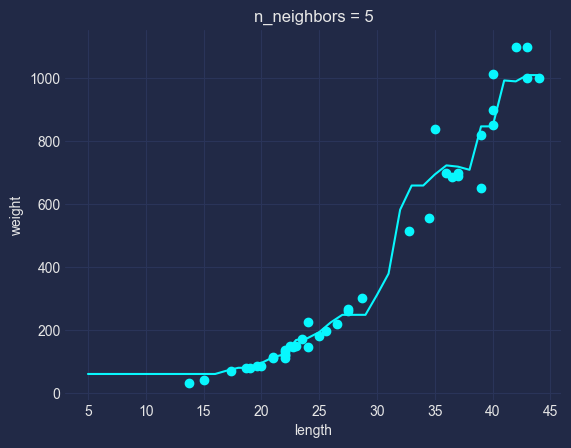

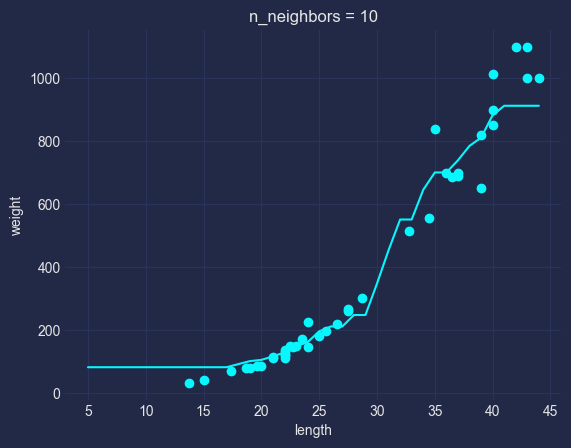

In [627]:
knr = KNeighborsRegressor()

# test 데이터 생성
x = np.arange(5, 45).reshape(-1, 1)

# n_neighbors를 1, 5, 10으로 변경하며 학습
for n in [1, 5, 10]:

    knr.n_neighbors = n
    knr.fit(train_input, train_target)

    # test 데이터 예측
    prediction = knr.predict(x)

    # 결과 시각화
    plt.style.use("cyberpunk")

    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

# 선형 회귀

## k-최근접 이웃의 한계

In [628]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
                         21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
                         22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
                         27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
                         36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
                         40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
                         110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
                         130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
                         197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
                         514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
                         820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
                         1000.0, 1000.0])

In [629]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# train, test 데이터를 열벡터로 변환 (scikit-learn의 fit 메소드가 훈련 데이터를 2차원 배열로 예상하기 때문)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1) 

In [630]:
# KNeighborsRegressor 클래스 인스턴스 생성 후 knr 변수에 할당
knr = KNeighborsRegressor(n_neighbors=3)
# 모델 학습
knr.fit(train_input, train_target)

# length가 50인 농어의 무게 예측
test_data = np.array([[50]])
print(knr.predict(test_data))

[1033.33333333]


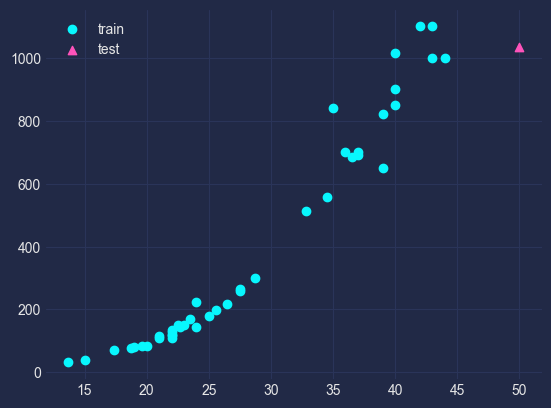

In [631]:
# test 데이터의 이웃, 이웃과의 거리 계산
# 이전에 n_neighbors가 3이라서 test_data로 부터 이웃 3개에 대한 거리와 인덱스를 변수에 저장
distance, indexes = knr.kneighbors(test_data)
# 결과 시각화
plt.style.use("cyberpunk")

plt.scatter(train_input, train_target, label='train')
# 
plt.scatter(test_data, knr.predict(test_data), marker='^', label='test')
plt.legend()
plt.show()

In [632]:
# 이웃 데이터들의 평균 값과 test_data의 예측 값 비교
neighbors_means = np.mean(train_target[indexes], axis=1)

# 당연히 같음 k-최근접 이웃 회귀에서 predict() 할 때도 이웃 데이터 포인트들의 타겟 값(또는 레이블)의 평균을 취하기 때문
print(neighbors_means)
print(knr.predict(test_data))

[1033.33333333]
[1033.33333333]


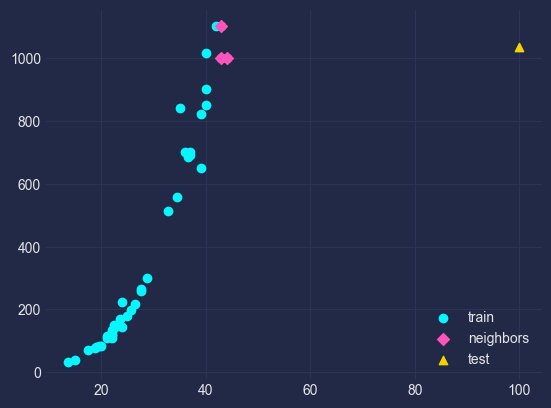

In [633]:
test_data2 = np.array([[100]])

distances, indexes = knr.kneighbors(test_data2)

plt.style.use("cyberpunk")
plt.scatter(train_input, train_target, label='train')
plt.scatter(train_input[indexes], train_target[indexes], marker='D', label='neighbors')
plt.scatter(test_data2, knr.predict(test_data2), marker='^', label='test')
plt.legend(loc='lower right')
plt.show()

# 가장 가까운 세개의 평균값으로 예측되기 때문에 길이가 100, 200, 300 커져도 무게는 1033 그대로 예측되는 문제가 있다. 그래서 Linear Regression을 사용해야함.

## 선형 회귀

In [634]:
from sklearn.linear_model import LinearRegression
# 선형회귀 모델 생성
lr = LinearRegression()
# 모델 학습
lr.fit(train_input, train_target)

print(lr.predict(test_data))

[1241.83860323]


In [635]:
# 기울기(coefficient)와 절편(intercept) 확인
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


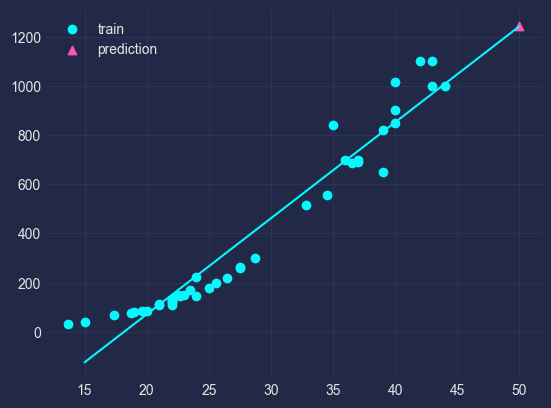

In [636]:
x = np.arange(15, 51)

plt.style.use("cyberpunk")
plt.scatter(train_input, train_target, label='train')
# 15에서 50까지 1차 방정식 그래프 (y = ax + b)
plt.plot(x, x*lr.coef_ + lr.intercept_)

# 50cm 농어 데이터
plt.scatter(test_data, lr.predict(test_data), marker='^', label='prediction')
plt.legend()
plt.show()

In [637]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

# 과소적합이 나타나는데 특성이 너무 적어서 나타나는듯 하다. -> 다항회귀로 feature 수를 늘려보자 (y = ax^2 + bx + c)

0.9398463339976041
0.824750312331356


## 다항 회귀

In [638]:
train_poly = np.column_stack([train_input ** 2, train_input])
test_poly = np.column_stack([test_input ** 2, test_input])

In [639]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [640]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

# 모델이 2차 다항 회귀를 사용하기 때문에 기존 특성을 제곱한 값 추가
test_data = np.array([[50**2, 50]])
print(lr.predict(test_data))

[1573.98423528]


In [644]:
# coefficient, intercept 확인
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278338


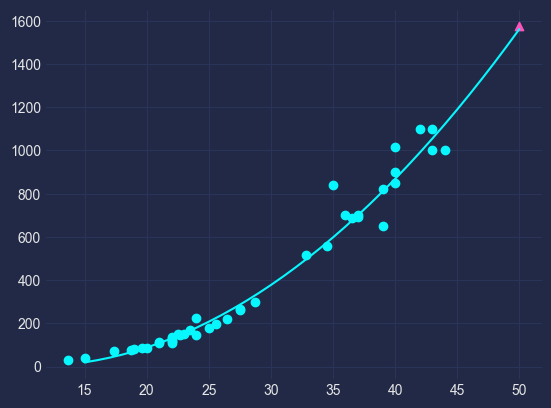

In [645]:
x = np.arange(15, 51)
plt.style.use("cyberpunk")
plt.scatter(train_input, train_target)

# x에 대한 2차 방정식 계산
plt.plot(x, 1.01*x**2 - 21.6*x + 116.05)

# 
plt.scatter(50, lr.predict(test_data), marker='^')
plt.show()

In [643]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 어느정도 잘 예측된..건가?

0.9706807451768623
0.9775935108325122
